# Redução de dimensionalidade via PCA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd 
import common as com
# import pca

import sklearn.datasets as datasets
from sklearn.datasets import fetch_openml

np.random.seed(12345)

#data = fetch_openml(name='mfeat-karhunen')
#data = fetch_openml(name='heart-statlog')
#data = fetch_openml(name='vehicle')
#data = fetch_openml(name='sonar')
#data = fetch_openml(name='glass')
#data = fetch_openml(name='ecoli')
#data = fetch_openml(name='yeast')
#data = fetch_openml(name='splice')
#data = fetch_openml(name='vowel')
#data = fetch_openml(name='credit-g')
# data = fetch_openml(name='spambase')
# label_names = np.unique(data.target)
# x = data.data
# y = np.zeros(data.target.shape[0], dtype=int)
# for k, k_label in enumerate(label_names):
#     y[data.target == k_label] = k

x, y = datasets.load_iris(return_X_y=True); label_names = datasets.load_iris()['target_names']
#x, y = datasets.load_wine(return_X_y=True); label_names = datasets.load_wine()['target_names']
#x, y = datasets.load_breast_cancer(return_X_y=True); label_names = datasets.load_breast_cancer()['target_names'] 

print("Número de padrões: %d" % x.shape[0])
print("Número de atributos: %d" % x.shape[1])
print("Número de classes: %d" % np.unique(y).shape[0])

def compute(x):
    mean = np.mean(x, axis = 0)
    cov = np.cov(x)
    
    S, U, V = svd(cov)
    M = S @ U @ np.tranpose(V)
    P = np.transpose(U)
    return {'S': S, 'U': U, 'V': V, 'M': M, 'P': P}

# def transform(x, pca_result, dim=2):

Número de padrões: 150
Número de atributos: 4
Número de classes: 3


FileNotFoundError: [Errno 2] No such file or directory: 'figs/iris_scatter.png'

<Figure size 576x432 with 0 Axes>

/home/384341/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


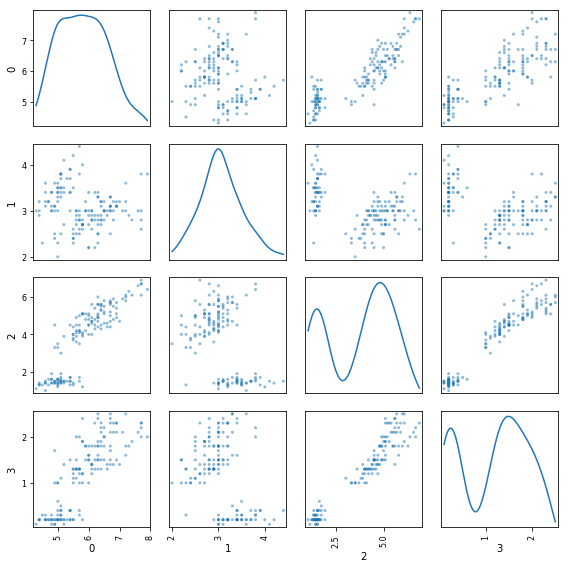

In [6]:
if x.shape[1] <= 5:
    fig = plt.figure(figsize=com.figsize)
    axes = pd.plotting.scatter_matrix(pd.DataFrame(x), figsize=(8, 8), diagonal='kde')
    plt.tight_layout()
    plt.title("")
    plt.savefig('figs/iris_scatter.png', dpi=com.dpi)

In [ ]:
labels = np.unique(y)
colors = plt.cm.hsv(np.linspace(0, 0.8, labels.shape[0]))

def plot_data(x, y, marker='o', legend=False, only_data=False):    
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        plt.scatter(x[y == label,0], x[y == label,1],
                    s=10*com.markersize, marker=marker, color=colors[i])
    if legend:
        plt.legend()

pca_result = pca.compute(x)

explained_variance = np.cumsum(pca_result['eigen_values'])
fig = plt.figure(figsize=com.figsize)
plt.rcParams.update({'font.size': com.fontsize})
plt.plot(explained_variance/explained_variance[-1])
plt.xlabel("Dimensões")
plt.ylabel("Proporção de variância explicada")
plt.title("Análise da aplicação do PCA")
plt.savefig('figs/pca_iris_var.png', dpi=com.dpi)

In [ ]:
x_transformed = pca.transform(x, pca_result, dim=2)

fig = plt.figure(figsize=com.figsize)
plot_data(x_transformed, y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projeção nas 2 componentes principais do PCA")
plt.savefig('figs/pca_iris.png', dpi=com.dpi)
plt.show()